# Explore DRAPER Satellite Image Data

#### Author: Kalai Ramea

## Problem Statement

Training data folder consists of satellite images daily taken from day one to day five. Test data folder consists of five sets of random images of the same place. The model has to use the train data and learn the pattern of images taken daily, and arrange the images of each set in the test folder.

This notebook will go through some exploratory analysis of the images in the training dataset.

In [2]:
import cv2
import numpy as np
import sys
from math import atan2, degrees, pi
from skimage.data import camera
from skimage import feature
from skimage.filters import roberts, sobel, scharr, prewitt
import PIL
from PIL import Image
from scipy import ndimage as ndi

import matplotlib.pyplot as plt
%matplotlib inline

As an example, the five images of set 175 will be read into the model. OpenCV package is used for reading and processing the images, along with skimage.

In [3]:
img1 = cv2.imread('/Users/kalaivanikubendran/Documents/Sideprojects/kalai-kaggle-code/train_sm/set175_1.jpeg',1)
img2 = cv2.imread('/Users/kalaivanikubendran/Documents/Sideprojects/kalai-kaggle-code/train_sm/set175_2.jpeg',1)
img3 = cv2.imread('/Users/kalaivanikubendran/Documents/Sideprojects/kalai-kaggle-code/train_sm/set175_3.jpeg',1)
img4 = cv2.imread('/Users/kalaivanikubendran/Documents/Sideprojects/kalai-kaggle-code/train_sm/set175_4.jpeg',1)
img5 = cv2.imread('/Users/kalaivanikubendran/Documents/Sideprojects/kalai-kaggle-code/train_sm/set175_5.jpeg',1)

In [4]:
print "Shape of RGB image is ", img1.shape
print "Size of RGB image is ", img1.size

Shape of RGB image is  (2329, 3100, 3)
Size of RGB image is  21659700


Reading the same image in grayscale removes the third dimension (RGB values).

In [5]:
img_gs = cv2.imread('/Users/kalaivanikubendran/Documents/Sideprojects/kalai-kaggle-code/train_sm/set175_1.jpeg',0)

In [6]:
print "Shape of Grayscale image is ", img_gs.shape
print "Size of Grayscale image is ", img_gs.size

Shape of Grayscale image is  (2329, 3100)
Size of Grayscale image is  7219900


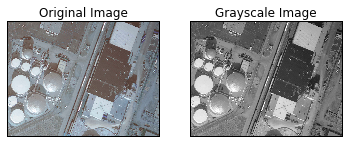

In [7]:
plt.subplot(121),plt.imshow(img1)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_gs,cmap = 'gray')
plt.title('Grayscale Image'), plt.xticks([]), plt.yticks([])

plt.show()

## OPTIONAL:  This code will reduce the size of the images. 

This may work for some images, when they are not "busy". It would be good enough to extract the SURF points, hough lines, etc. Might not work for images with a lot of houses, for example. 

In [8]:
basewidth = 300
img = Image.open('/Users/kalaivanikubendran/Documents/Sideprojects/kalai-kaggle-code/train_sm/set175_1.jpeg')
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
img.save('175-1-sm.jpg')

In [9]:
img_sm = cv2.imread('175-1-sm.jpg')

print "Size of the reduced RGB image is ", img_sm.size
print "Shape of the reduced RGB image is ", img_sm.shape

img_sm_gs = cv2.imread('175-1-sm.jpg', 0)

print "Size of the Grayscale image is ", img_sm_gs.size
print "Shape of the Grayscale image is ", img_sm_gs.shape

Size of the reduced RGB image is  202500
Shape of the reduced RGB image is  (225, 300, 3)
Size of the Grayscale image is  67500
Shape of the Grayscale image is  (225, 300)


## Edge Detection

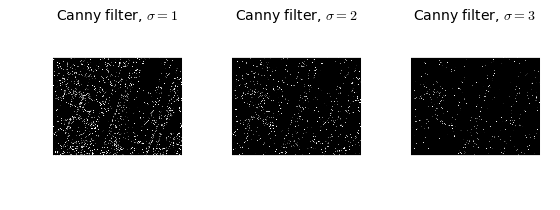

In [10]:
edges1 = feature.canny(img_gs)
edges2 = feature.canny(img_gs, sigma=2)
edges3 = feature.canny(img_gs, sigma=3)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(edges1, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('Canny filter, $\sigma=1$', fontsize=14)

ax2.imshow(edges2, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=2$', fontsize=14)

ax3.imshow(edges3, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=14)

fig.tight_layout()

plt.show()

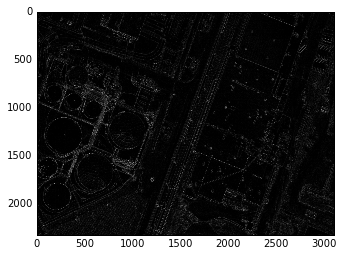

In [11]:
edge_sobel = sobel(img_gs)

plt.imshow(edge_sobel, cmap=plt.cm.gray)
plt.show()

The edges are feeble now. But, we can play around with the threshold to make them stronger.

## Histogram of RGB band

In [12]:
hist1 = cv2.calcHist(img1, [0, 1], None, [180, 256], [0, 180, 0, 256])
hist2 = cv2.calcHist(img2, [0, 1], None, [180, 256], [0, 180, 0, 256])
hist3 = cv2.calcHist(img3, [0, 1], None, [180, 256], [0, 180, 0, 256])
hist4 = cv2.calcHist(img4, [0, 1], None, [180, 256], [0, 180, 0, 256])
hist5 = cv2.calcHist(img5, [0, 1], None, [180, 256], [0, 180, 0, 256])

Histogram of all the five images. It highlights the brighest spots in the images. We can observe the same spots moving around in the image in the subsequent days.

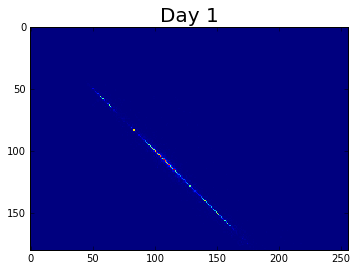

In [13]:
plt.imshow(hist1,interpolation = 'nearest' )
plt.title('Day 1', fontsize=20)

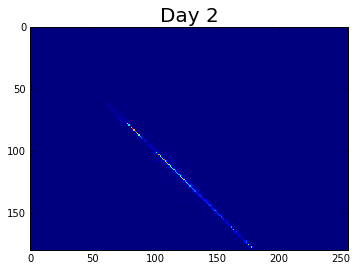

In [18]:
plt.imshow(hist2,interpolation = 'nearest' )
plt.title('Day 2', fontsize=20)

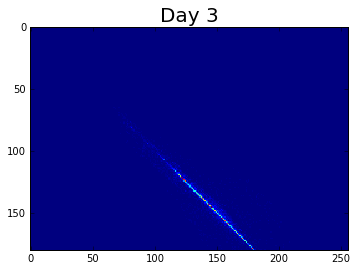

In [19]:
plt.imshow(hist3,interpolation = 'nearest' )
plt.title('Day 3', fontsize=20)

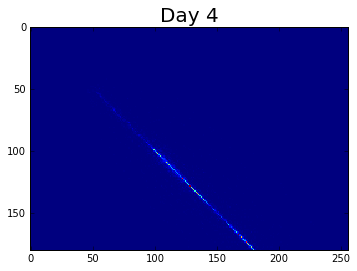

In [20]:
plt.imshow(hist4,interpolation = 'nearest' )
plt.title('Day 4', fontsize=20)

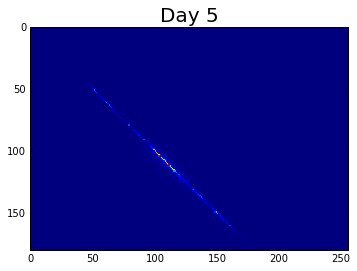

In [21]:
plt.imshow(hist5,interpolation = 'nearest' )
plt.title('Day 5', fontsize=20)

All the five images laid next to each other.

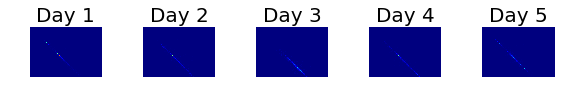

In [22]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(8, 3))



ax1.imshow(hist1,interpolation = 'nearest')
ax1.axis('off')
ax1.set_title('Day 1', fontsize=20)

ax2.imshow(hist2,interpolation = 'nearest')
ax2.axis('off')
ax2.set_title('Day 2', fontsize=20)

ax3.imshow(hist3,interpolation = 'nearest')
ax3.axis('off')
ax3.set_title('Day 3', fontsize=20)

ax4.imshow(hist4,interpolation = 'nearest')
ax4.axis('off')
ax4.set_title('Day 4', fontsize=20)

ax5.imshow(hist5,interpolation = 'nearest')
ax5.axis('off')
ax5.set_title('Day 5', fontsize=20)

fig.tight_layout()

plt.show()

## Speeded Up Robust Feature (SURF) Detection

SURF detects 'points of interest' in the image. In computer vision, Speeded Up Robust Features (SURF) is a local feature detector and descriptor that can be used for tasks such as object recognition or registration or classification. SIFT is another measure that could be used. These points can be used for tracking in the image set.

In [14]:
surf = cv2.SURF(600)
surf.hessianThreshold = 1000
kp1, des1 = surf.detectAndCompute(img1, None)
kp2, des2 = surf.detectAndCompute(img2, None)
kp3, des3 = surf.detectAndCompute(img3, None)
kp4, des4 = surf.detectAndCompute(img4, None)
kp5, des5 = surf.detectAndCompute(img5, None)

In [15]:
surf1 = cv2.drawKeypoints(img1, kp1, None, (255,0,0),4)
surf2 = cv2.drawKeypoints(img2, kp2, None, (255,0,0),4)
surf3 = cv2.drawKeypoints(img3, kp3, None, (255,0,0),4)
surf4 = cv2.drawKeypoints(img4, kp4, None, (255,0,0),4)
surf5 = cv2.drawKeypoints(img5, kp5, None, (255,0,0),4)

#### SURF Points in Day one image

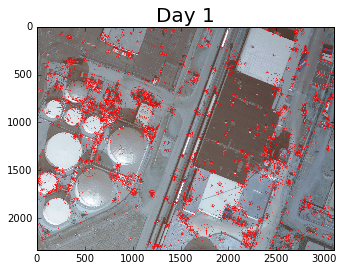

In [16]:
plt.imshow(surf1)
plt.title('Day 1', fontsize=20)

We can see the points of interest highlighted in the image. Adjusting the threshold would reduce/increase the density of these points. They could potentially be used to track in each image.

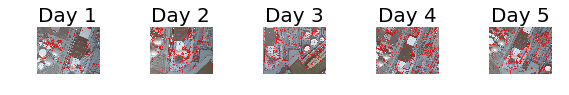

In [17]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(8, 3))


ax1.imshow(surf1)
ax1.axis('off')
ax1.set_title('Day 1', fontsize=20)

ax2.imshow(surf2)
ax2.axis('off')
ax2.set_title('Day 2', fontsize=20)

ax3.imshow(surf3)
ax3.axis('off')
ax3.set_title('Day 3', fontsize=20)

ax4.imshow(surf4)
ax4.axis('off')
ax4.set_title('Day 4', fontsize=20)

ax5.imshow(surf5)
ax5.axis('off')
ax5.set_title('Day 5', fontsize=20)

fig.tight_layout()

plt.show()

## Hough Transform (Hough lines)

This will extract prominent features in the image in the form of lines. This can potentially be used to measure the angular changes or differences between the images. For example, if day 1 image is at 90-degrees, and day-2 image is always at 85-degrees, and so on, the model could be designed to "learn" these angle differences between these images in the training data. This could be used on test data to arrange the images in the set.

Thresholds are again important to identify the most prominent lines. Some images are busy and others are not. One threshold may not fit all, need to find the right amount. Angles of these Hough lines could be measured from x-axis, for example, for each image. 

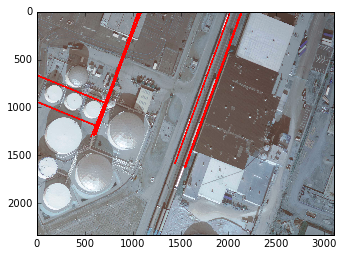

In [19]:
gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,100,300,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,300)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img1,(x1,y1),(x2,y2),(255,0,0),10)

plt.imshow(img1)

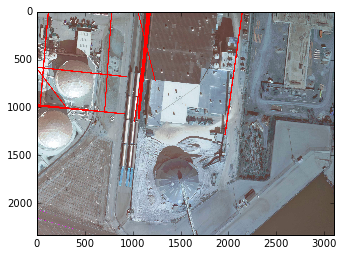

In [21]:
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,100,300,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,300)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img2,(x1,y1),(x2,y2),(255,0,0),10)

plt.imshow(img2)

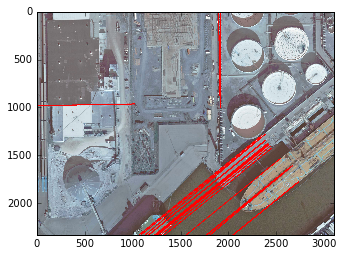

In [22]:
gray = cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,100,300,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,300)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img3,(x1,y1),(x2,y2),(255,0,0),10)

plt.imshow(img3)

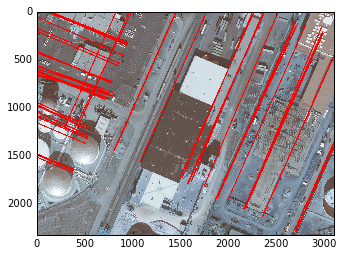

In [23]:
gray = cv2.cvtColor(img4,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,100,300,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,300)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img4,(x1,y1),(x2,y2),(255,0,0),10)

plt.imshow(img4)

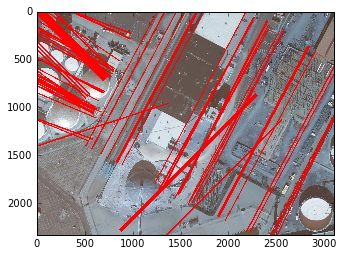

In [24]:
gray = cv2.cvtColor(img5,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,100,300,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,300)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img5,(x1,y1),(x2,y2),(255,0,0),10)

plt.imshow(img5)

## Potential Approach

- There is definitely a pattern in how the images change from day 1 to day 5. Day 2 is always west of day 1, day 3, 4, and 5, are zoomed out a bit. We need to be able to get a pattern based on rotation, scale, and translation between the images. Challenge is to measure these.
- Hough lines are good at measuring angles.
- SURF points could be used for measuring the prominent objects, which could be used for tracking.
- Need another measure of geometry to quantify scale of the image.
- The approach would be to design a model such that it learns these differences of days 2-5 from day 1. These could be applied to images in the test set.